In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. Load the data
df = pd.read_csv('spambase.data', delimiter=',')

print(df.columns)

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')


In [3]:
#handling spambase.names file
def handle_spambase_names(df, filename):
    names = []

    with open(filename, 'r') as f:
        for line in f:
            if ":" in line and not line.startswith("|"):
                name = line.split(':')[0]
                names.append(name)

    if 'spam' not in names:
        names.append('spam')

    if len(names) != len(df.columns):
        raise ValueError(f"Length mismatch: {len(names)} names, {len(df.columns)} columns")

    df.columns = names

# Call the function
handle_spambase_names(df, 'spambase.names')


#Appending spam column to names list
names = list(df.columns)
print(names)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [4]:
#Assuming that the target variable is 'spam' and the rest are features
X = df.drop('spam', axis=1)
y = df['spam']


In [5]:
#Handling class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

In [6]:
# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.2, random_state=42)

In [7]:
#Handling class imbalance
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_smote, y_train = sm.fit_resample(X_train, y_train)

In [8]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Create a KNN regresssor and train the model for different values of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 3. Train the model
errors = []
r2_scores = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
    r2_scores.append(knn.score(X_test, y_test))

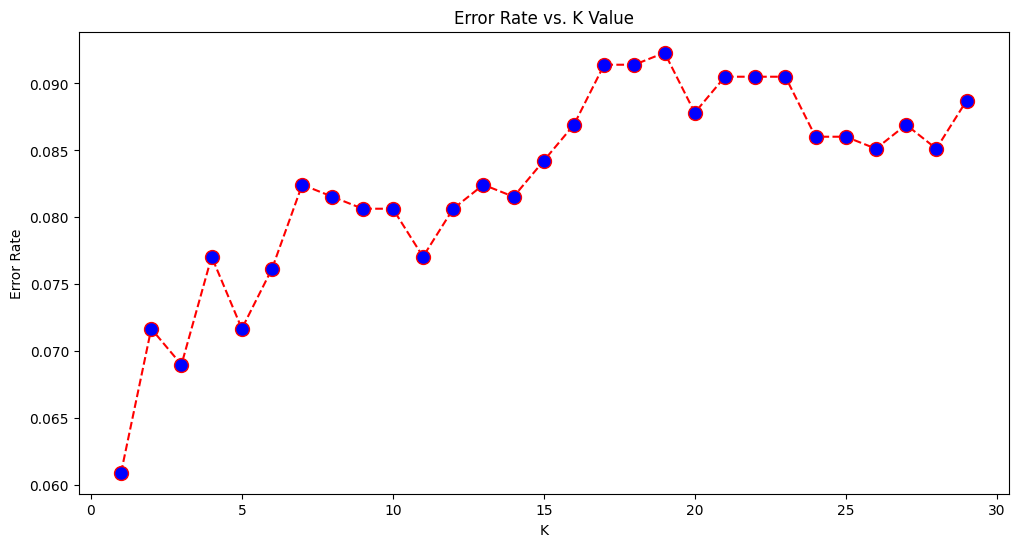

In [10]:
# 4. Plot the error rate against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

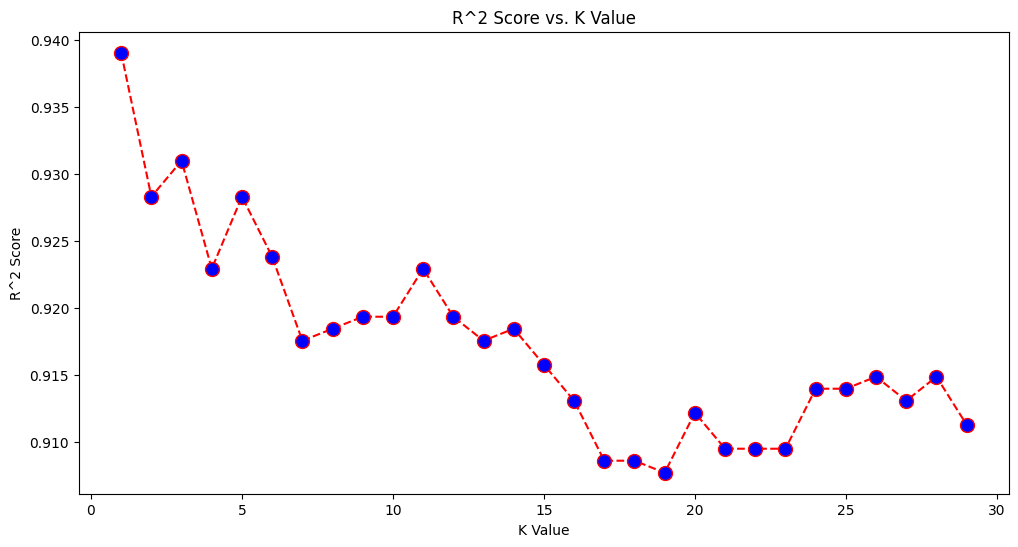

In [11]:
# 5. Plot the R2 score against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), r2_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('R^2 Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('R^2 Score')
plt.show()


In [17]:
#print the accuracy, precision, recall, and f1_score for the best model and specify what the value of K is for that model

print("The accuracy score is: ", accuracy_score(y_test, y_pred))
print("The f1 score is: ", f1_score(y_test, y_pred))
print("The mse is: ", min(errors))
print("The best r^2 score is: ", max(r2_scores))
print("The rmse is: ", np.sqrt(min(errors)))
print("The best k value is: ", errors.index(min(errors))+1)
print("The worst k value is: ", errors.index(max(errors))+1)

The accuracy score is:  0.9112903225806451
The f1 score is:  0.9113697403760072
The mse is:  0.06093189964157706
The best r^2 score is:  0.9390681003584229
The rmse is:  0.2468438770591182
The best k value is:  1
The worst k value is:  19
